# Facial Expression Recognition

## Initialisation

In [4]:
!pip install fastai
from fastai.vision.all import *
from fastai.vision.widgets import *

# Define the path
path = Path("/kaggle/input/face-expression-recognition-dataset/")
model_dir = "/kaggle/working/"

## Prepare labels

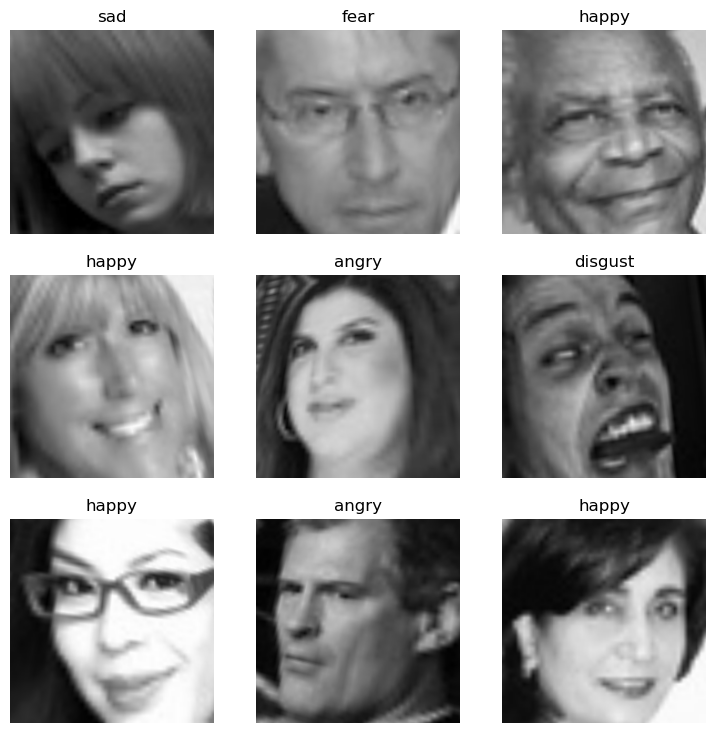

In [2]:
faces = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

faces.show_batch()

## Create and test a learner

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 166MB/s] 


SuggestedLRs(valley=0.0030199517495930195)

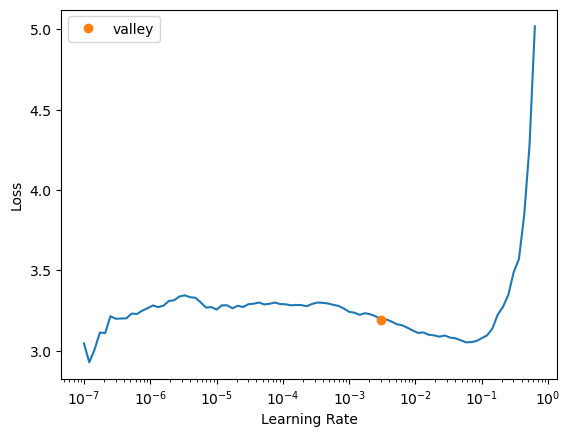

In [5]:
# create a learner
learn = vision_learner(faces, resnet34, metrics=error_rate, model_dir=model_dir)
learn.lr_find() # find the optimal learning rate

epoch,train_loss,valid_loss,error_rate,time
0,1.475988,1.355159,0.517904,13:06


epoch,train_loss,valid_loss,error_rate,time
0,1.023626,0.966704,0.361363,10:18
1,0.896351,0.842349,0.314268,08:29
2,0.704557,0.689112,0.250313,08:28
3,0.549338,0.633355,0.222307,08:25


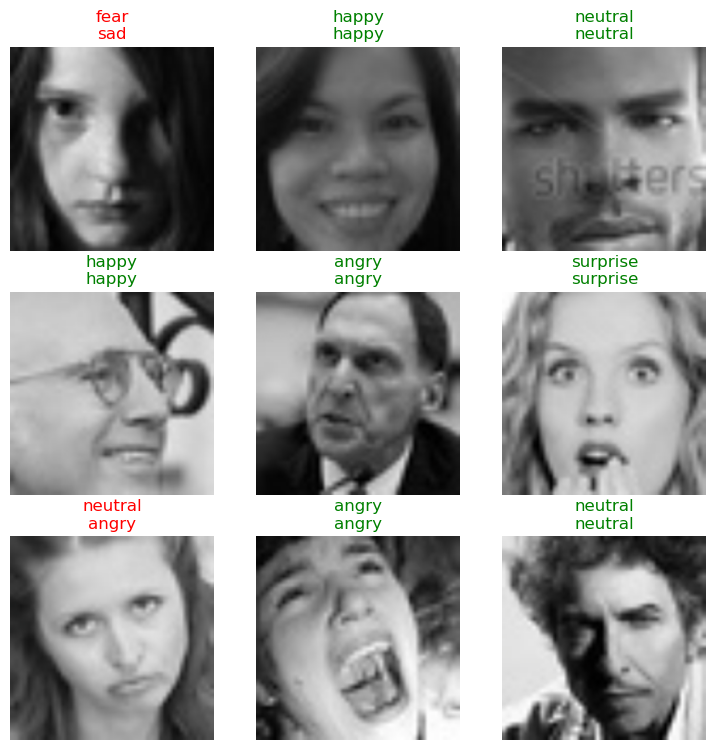

In [7]:
learn.fine_tune(4, 3e-3) # train the model
learn.show_results() # check the results

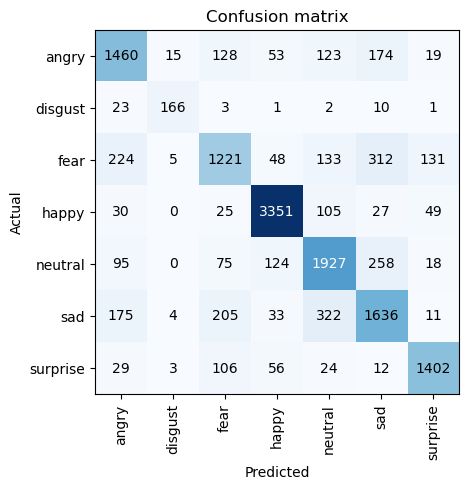

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

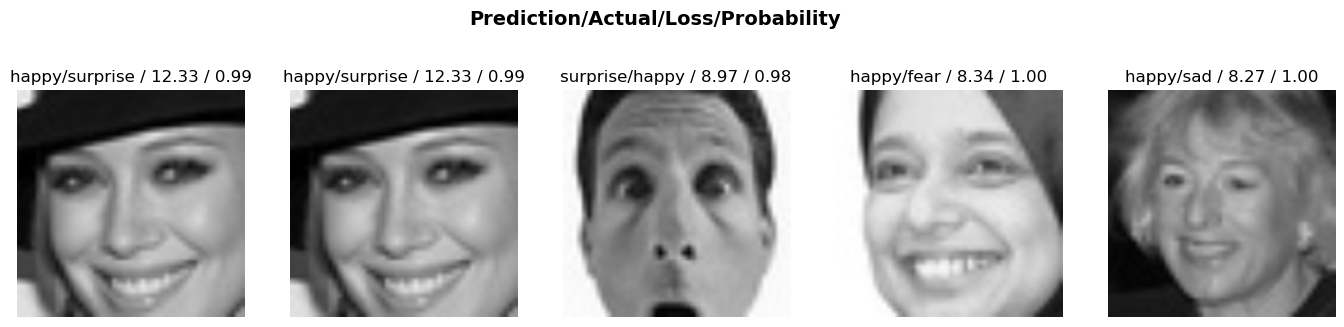

In [11]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

These predictions are actually correct, so it looks like we'll need to do some data cleaning.

In [12]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [18]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#! model is in a read-only directory on kaggle
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [20]:
learn.export('/kaggle/working/model.pkl')